### Limpieza de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os

In [2]:
ruta = 'c:\\Users\\ps.escobar\\OneDrive - Universidad de los andes\\Documentos\\GitHub\\predicting_poverty_bdmc'
print(os.getcwd())

#'c:\\Users\\ps.escobar\\OneDrive - Universidad de los andes\\Documentos\\GitHub\\predicting_poverty_bdmc'

c:\Users\ps.escobar\OneDrive - Universidad de los andes\Documentos\GitHub\predicting_poverty_bdmc\scripts


In [3]:
#Amrimos las bases de datos
tr_p = pd.read_csv(ruta+'\\stores\\train_personas.csv')
ts_p = pd.read_csv(ruta+'\\stores\\test_personas.csv')
tr_h = pd.read_csv(ruta+'\\stores\\train_hogares.csv')
ts_h = pd.read_csv(ruta+'\\stores\\test_hogares.csv')

In [4]:
#Crear variables para luego unir bases
tr_p['sample'] = 'train'
tr_h['sample'] = 'train'
ts_p['sample'] = 'test'
ts_h['sample'] = 'test'

In [5]:
#train personas
trp_l = tr_p.rename(columns = {
    'P6020': 'sexo',
    'P6040': 'edad',
    'P6090': 'afil_salud',
    'P6100': 'reg_salud',
    'P6210': 'nivel_edu',
    'P6210s1': 'anos_edu',
    'P6240': 'semana_oficio',
    'P6430': 'posi_lab',
    'P6510': 'h_extra',
    'P6545': 'prima',
    'P6580': 'bonos',
    'P6585s1': 'a_alim',
    'P6585s2': 'a_trans',
    'P6585s3': 'a_fam',
    'P6585s4': 'a_edu',
    'P6590': 'sal_alim',
    'P6600': 'sal_viv',
    'P6620': 'sal_especie',
    'P6630s1': 'prima_serv',
    'P6630s2': 'prima_nav',
    'P6630s3': 'prima_vac',
    'P6630s4': 'viaticos',
    'P6630s6': 'bon_anual',
    'P6800': 'h_tra_prin',
    'P6920': 'afil_pension',
    'P7045': 'h_tra_2',
    'P7495': 'arriendo',
    'P7500s2': 'pension',
    'P7500s3': 'pat_pension',
    'P7510s2': 'hog_int',
    'P7510s3': 'ayuda_gov',
    'P7510s5': 'rent_inv',
    'P7510s6': 'rent_cesantias',
    'P7510s7': 'otras_fuentes',
    'P7422': 'ing_desempleo',
    'Ingtot' : 'ingtot'
})

#test personas
tsp_l = ts_p.rename(columns = {
    'P6020': 'sexo',
    'P6040': 'edad',
    'P6090': 'afil_salud',
    'P6100': 'reg_salud',
    'P6210': 'nivel_edu',
    'P6210s1': 'anos_edu',
    'P6240': 'semana_oficio',
    'P6430': 'posi_lab',
    'P6510': 'h_extra',
    'P6545': 'prima',
    'P6580': 'bonos',
    'P6585s1': 'a_alim',
    'P6585s2': 'a_trans',
    'P6585s3': 'a_fam',
    'P6585s4': 'a_edu',
    'P6590': 'sal_alim',
    'P6600': 'sal_viv',
    'P6620': 'sal_especie',
    'P6630s1': 'prima_serv',
    'P6630s2': 'prima_nav',
    'P6630s3': 'prima_vac',
    'P6630s4': 'viaticos',
    'P6630s6': 'bon_anual',
    'P6800': 'h_tra_prin',
    'P6920': 'afil_pension',
    'P7045': 'h_tra_2',
    'P7495': 'arriendo',
    'P7500s2': 'pension',
    'P7500s3': 'pat_pension',
    'P7510s2': 'hog_int',
    'P7510s3': 'ayuda_gov',
    'P7510s5': 'rent_inv',
    'P7510s6': 'rent_cesantias',
    'P7510s7': 'otras_fuentes',
    'P7422': 'ing_desempleo',
    'Ingtot' : 'ingtot'
})

In [6]:
#Nos quedamos con algunas variables para cada base

trp_l = trp_l[['id', 'Orden', 'Clase', 'Dominio', 'sexo', 'edad', 'afil_salud', 
               'reg_salud', 'nivel_edu', 'anos_edu', 'semana_oficio', 'posi_lab', 'h_extra', 
               'prima', 'bonos', 'a_alim', 'a_trans', 'a_fam', 'a_edu', 'sal_alim',
                'sal_viv', 'sal_especie', 'prima_serv', 'prima_nav', 'prima_vac', 
                'viaticos', 'bon_anual', 'h_tra_prin', 'afil_pension', 'h_tra_2', 
                'arriendo', 'pension', 'pat_pension', 'hog_int', 'ayuda_gov', 'rent_inv', 
                'rent_cesantias', 'otras_fuentes', 'reg_salud', 'semana_oficio', 
                'ing_desempleo', 'sample', 'ingtot']]

In [7]:
#Nos quedamos con algunas variables para cada base

tsp_l = tsp_l[['id', 'Orden', 'Clase', 'Dominio', 'sexo', 'edad', 'afil_salud',
                'reg_salud', 'nivel_edu', 'anos_edu', 'semana_oficio', 'posi_lab',
                'h_extra', 'prima', 'bonos', 'a_alim', 'a_trans', 'a_fam', 'a_edu',
                'sal_alim', 'sal_viv', 'sal_especie', 'prima_serv', 'prima_nav',
                'prima_vac', 'viaticos', 'bon_anual', 'h_tra_prin', 'afil_pension',
                'h_tra_2', 'arriendo', 'pension', 'pat_pension', 'hog_int', 'ayuda_gov',
                'rent_inv', 'rent_cesantias', 'otras_fuentes', 'reg_salud', 'semana_oficio',
                'ing_desempleo', 'sample']]

In [8]:
print(trp_l.shape)
print(tsp_l.shape)

(543109, 43)
(219644, 42)


In [17]:
#Unir las bases de datos
#Unimos mediante
#usamos outer para conservar todas las filas de ambas bases
bd_p = tsp_l.merge(trp_l, on = 'id', how = 'right')

In [18]:
bd_p.shape

(543109, 84)

In [27]:
# Obtener las columnas de trp_l y tsp_l
columnas_trp_l = set(trp_l.columns)
columnas_tsp_l = set(tsp_l.columns)

# Encontrar las columnas en trp_l pero no en tsp_l
columnas_exclusivas_trp_l = columnas_trp_l - columnas_tsp_l

# Mostrar las columnas exclusivas en trp_l
print("Número de columnas exclusivas en trp_l:", len(columnas_exclusivas_trp_l))
print("Columnas exclusivas en trp_l:")
print(columnas_exclusivas_trp_l)

Número de columnas exclusivas en trp_l: 1
Columnas exclusivas en trp_l:
{'ingtot'}


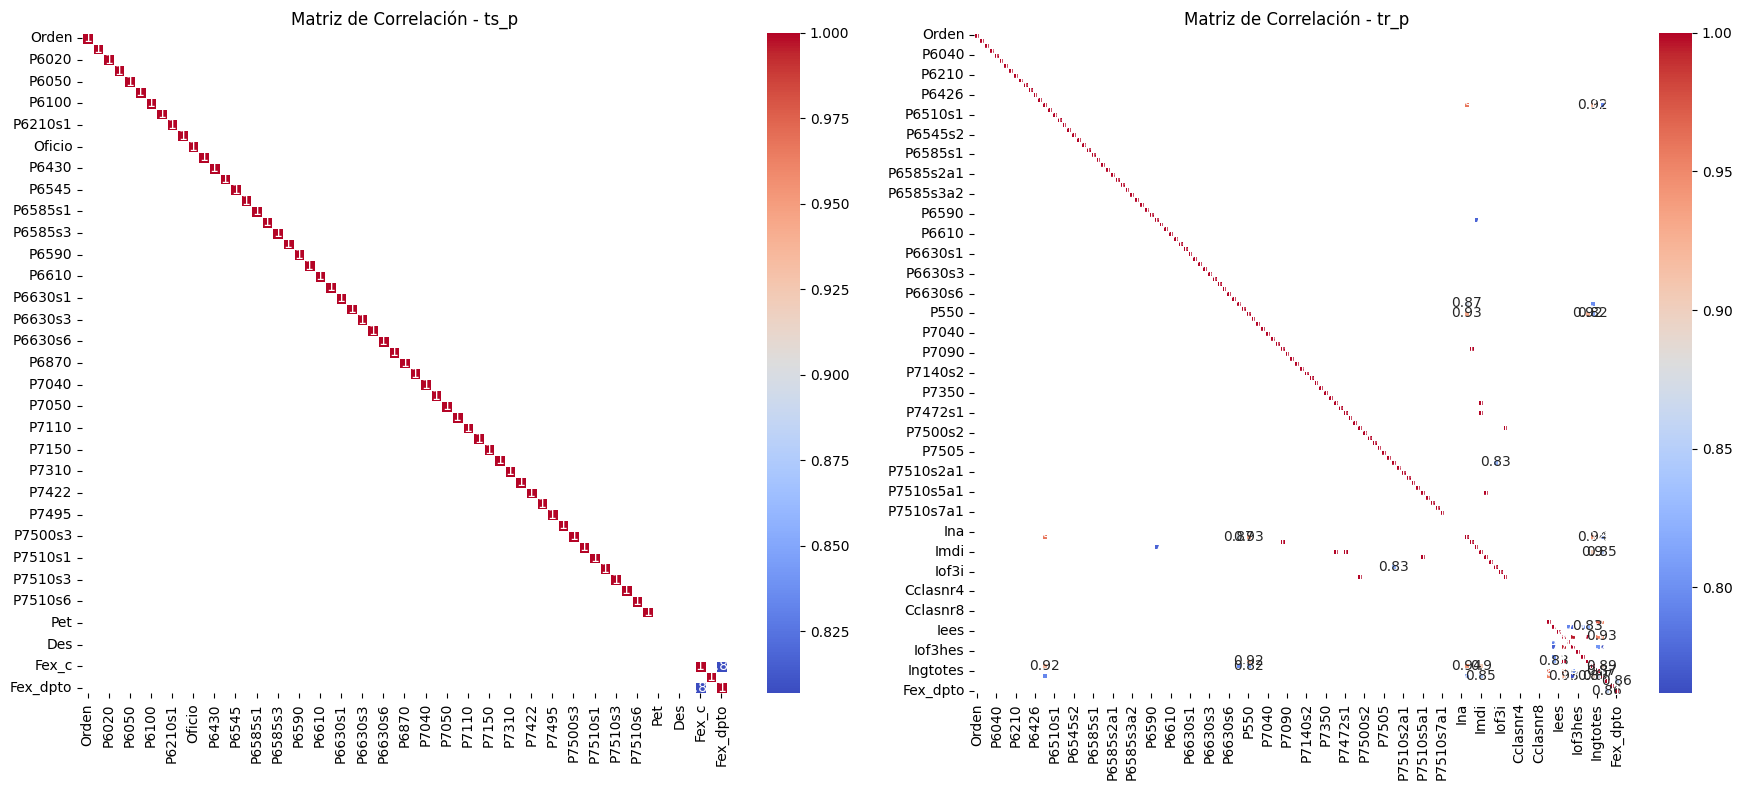

In [29]:
numeric_var_ts_p = ts_p.select_dtypes(include = 'number')
cor_matrix_ts_p = numeric_var_ts_p.corr()
tsp_cor_matrix = cor_matrix_ts_p[cor_matrix_ts_p > 0.75]

numeric_var_tr_p = tr_p.select_dtypes(include = 'number')
cor_matrix_tr_p = numeric_var_tr_p.corr()
trp_cor_matrix = cor_matrix_tr_p[cor_matrix_tr_p > 0.75]

fig, axes = plt.subplots(1, 2, figsize = (18, 8))

#Grafico para ts_p
sns.heatmap(tsp_cor_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, ax = axes[0])
axes[0].set_title('Matriz de Correlación - ts_p')

#Grafico para tr_p
sns.heatmap(trp_cor_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, ax = axes[1])
axes[1].set_title('Matriz de Correlación - tr_p')

#Ajusta y muestra la figura
plt.tight_layout()
plt.show()

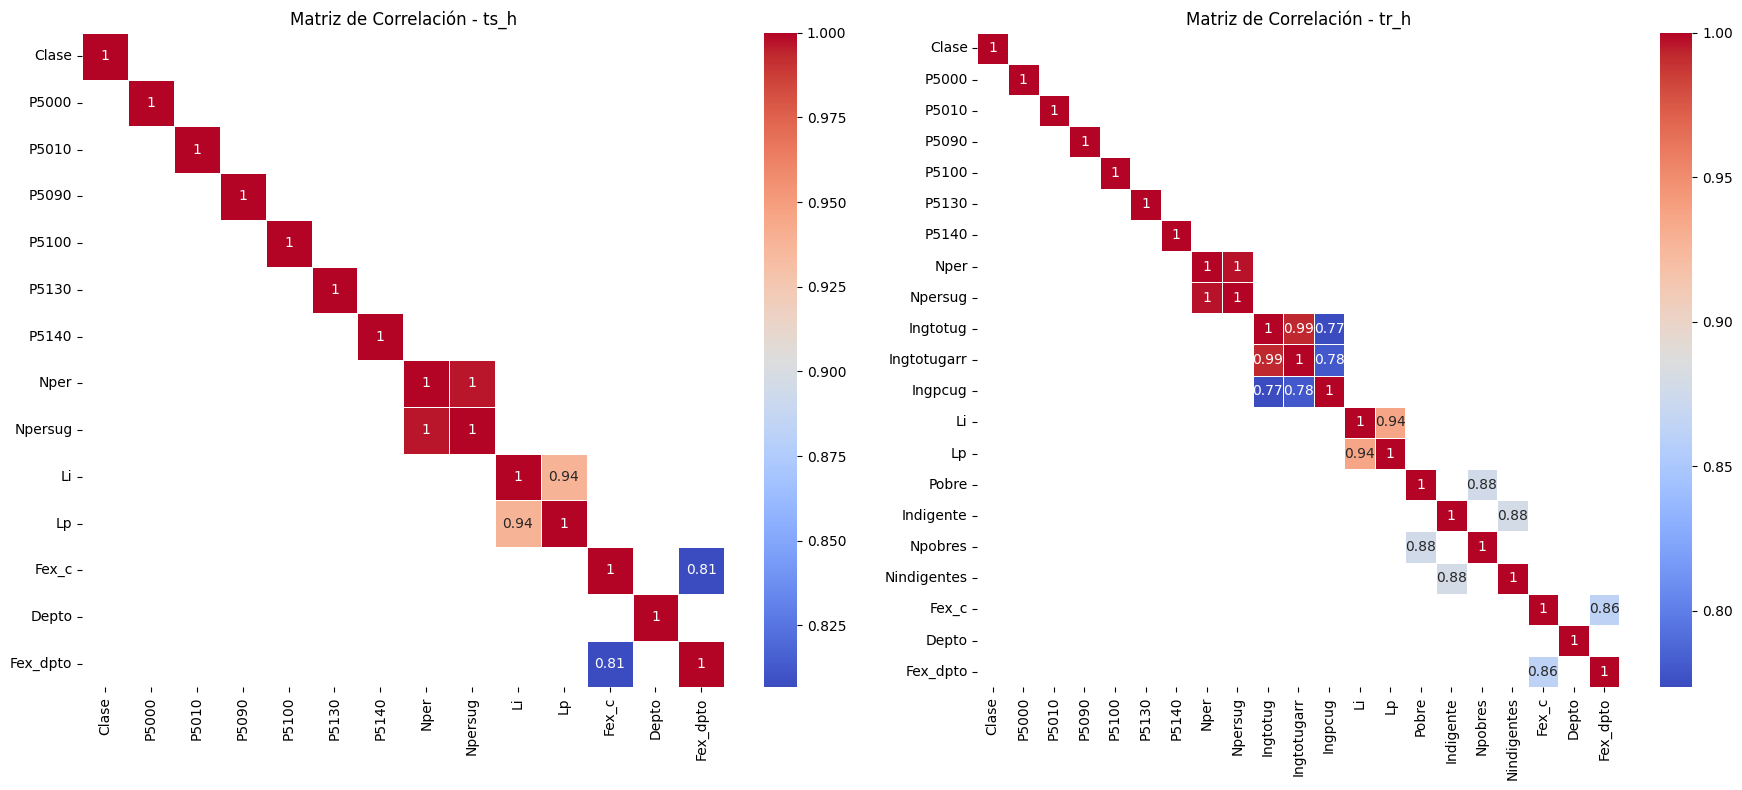

In [30]:
numeric_var_ts_h = ts_h.select_dtypes(include = 'number')
cor_matrix_ts_h = numeric_var_ts_h.corr()
tsh_cor_matrix = cor_matrix_ts_h[cor_matrix_ts_h > 0.75]

numeric_var_tr_h = tr_h.select_dtypes(include = 'number')
cor_matrix_tr_h = numeric_var_tr_h.corr()
trh_cor_matrix = cor_matrix_tr_h[cor_matrix_tr_h > 0.75]

fig, axes = plt.subplots(1, 2, figsize = (18, 8))

#Grafico para ts_p
sns.heatmap(tsh_cor_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, ax = axes[0])
axes[0].set_title('Matriz de Correlación - ts_h')

#Grafico para tr_p
sns.heatmap(trh_cor_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, ax = axes[1])
axes[1].set_title('Matriz de Correlación - tr_h')

#Ajusta y muestra la figura
plt.tight_layout()
plt.show()

Algunas variables tienen missing values bastante correlacionados entre ellos